In [2]:
from azure.storage.blob import BlobServiceClient
import json
import os
from PIL import Image
import matplotlib.pyplot as plt
import io  # Used to convert bytes to a file-like object


#set up storage
connection_string = "DefaultEndpointsProtocol=https;AccountName=mlfinalexam5505462853;AccountKey=0c40lghglG5/GlNK9yujDQAgo38GKoS2I3DeC/g22hwAEIFANKpmC/TqOpRk4RCT1DbfNiHBFt72+AStB+PfUA==;EndpointSuffix=core.windows.net"
container_name = "meterml"

#create client
blob_service_client = BlobServiceClient.from_connection_string(connection_string)
container_client = blob_service_client.get_container_client(container_name)

In [5]:
# Function to upload a jpg file to Azure Blob Storage with e.g. "CAM_BACK/" prefix
def upload_png_to_blob(file_name, path): #Upload the jpg file ("n003...6138205.jpg", "CAM_FRONT_LEFT/", "/Volumes/SSD/.../samples/CAM_FRONT_LEFT")
    # Full path to the file
    file_path = os.path.join(f"{path}/naip.png") #/Users/jonathan/Downloads/test_images/25.20927429016122_-80.8605493925447/naip.png
    
    # Blob name with prefix
    blob_name = f"samples/test_images/{file_name}.png" #samples/test_images/34.28639_-84.38311.png

    # Create a BlobClient for the blob
    blob_client = container_client.get_blob_client(blob_name)
    
    # Read the file and upload it to Azure
    with open(file_path, 'rb') as file_data:  # Open in binary mode
        blob_client.upload_blob(file_data, overwrite=True)  # Overwrite if the blob exists
        
        

In [6]:
# Directory containing the folders 
directory = "/Users/jonathan/Downloads/test_images"  # Local path to your directory


for root, dirs, files in os.walk(directory): 
    uploaded_count = 0 
    for name in dirs:
        #folder_name = f"{name}/" #item e.g. 25.20927429016122_-80.8605493925447/
        # Full path to the folder
        path = os.path.join(root, f"{name}") #path e.g. /Users/jonathan/Downloads/25.20927429016122_-80.8605493925447
        
        upload_png_to_blob(name, path)
        uploaded_count += 1
        print(f"Uploaded: {name} to samples/test_images/{name}.png") #samples/test_images/34.28639_-84.38311.png
        print(f"Uploaded {uploaded_count} out of {len(dirs)} PNG files in {directory}")
        

Uploaded: 45.38822562864609_-114.59348870362706 to samples/test_images/45.38822562864609_-114.59348870362706.png
Uploaded 1 out of 1018 PNG files in /Users/jonathan/Downloads/test_images
Uploaded: 37.73249214060236_-97.33496820929416 to samples/test_images/37.73249214060236_-97.33496820929416.png
Uploaded 2 out of 1018 PNG files in /Users/jonathan/Downloads/test_images
Uploaded: 31.22715073572652_-89.8732190082192 to samples/test_images/31.22715073572652_-89.8732190082192.png
Uploaded 3 out of 1018 PNG files in /Users/jonathan/Downloads/test_images
Uploaded: 30.947_-92.106 to samples/test_images/30.947_-92.106.png
Uploaded 4 out of 1018 PNG files in /Users/jonathan/Downloads/test_images
Uploaded: 38.28400239475607_-87.25168062777232 to samples/test_images/38.28400239475607_-87.25168062777232.png
Uploaded 5 out of 1018 PNG files in /Users/jonathan/Downloads/test_images
Uploaded: 32.210433_-103.521409 to samples/test_images/32.210433_-103.521409.png
Uploaded 6 out of 1018 PNG files in /U

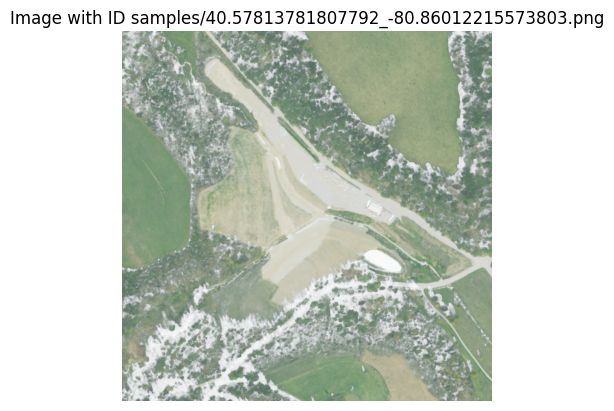

In [42]:
import os
import io
import tensorflow as tf
import numpy as np
from azure.storage.blob import BlobServiceClient, ContainerClient
from PIL import Image
import matplotlib.pyplot as plt
import ast

from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model

image_id = "samples/40.57813781807792_-80.86012215573803.png"

# Get the BlobClient for the specific image
blob_client = container_client.get_blob_client(image_id)

# Download the blob's content as bytes
blob_data = blob_client.download_blob().chunks()  # Read the entire blob content

# Convert the blob data into a file-like object using io.BytesIO
image_data = io.BytesIO(b"".join(blob_data))

# Open the image using PIL.Image
image = Image.open(image_data)

# Display the image using matplotlib
plt.imshow(image)
plt.axis('off')  # Hide axes for better visualization
plt.title(f"Image with ID {image_id}")
plt.show()

